# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from weather_api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + cities[i] + "&appid=" + weather_api_key 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | bama
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | gebeit
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | tsiombe
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | acapulco de juarez
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | berezovyy
Processing Record 18 of Set 1 | floro
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | edinburgh of the seven seas
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,279.35,92,100,3.89,SJ,1722470817
1,port-aux-francais,-49.3500,70.2167,278.00,98,100,12.57,TF,1722470817
2,bama,11.5221,13.6856,296.07,95,100,2.52,NG,1722470818
3,adamstown,-25.0660,-130.1015,295.43,87,23,9.54,PN,1722470818
4,vila franca do campo,37.7167,-25.4333,295.38,83,43,1.54,PT,1722470818


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../WeatherPy/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,279.35,92,100,3.89,SJ,1722470817
1,port-aux-francais,-49.3500,70.2167,278.00,98,100,12.57,TF,1722470817
2,bama,11.5221,13.6856,296.07,95,100,2.52,NG,1722470818
3,adamstown,-25.0660,-130.1015,295.43,87,23,9.54,PN,1722470818
4,vila franca do campo,37.7167,-25.4333,295.38,83,43,1.54,PT,1722470818


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

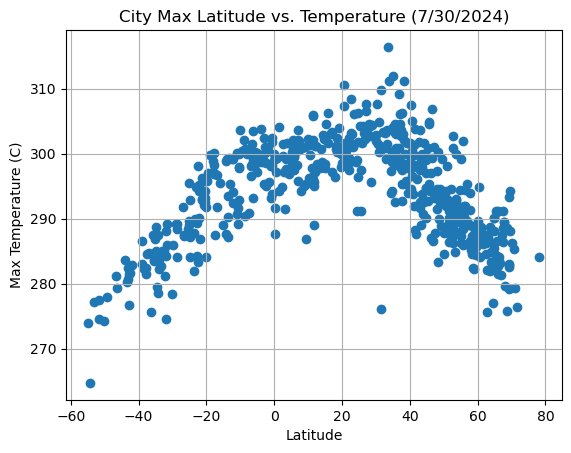

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")
            

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (7/30/2024)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

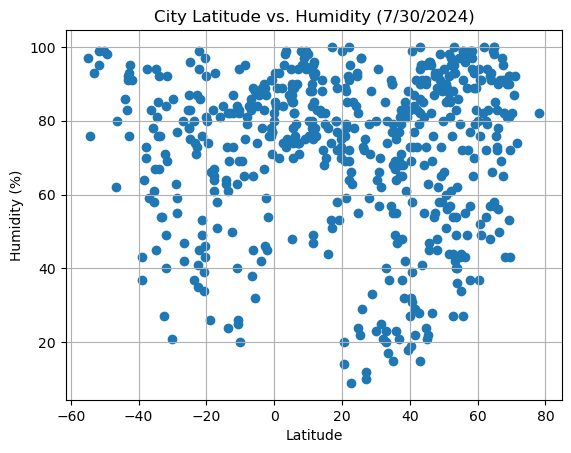

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")
            

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (7/30/2024)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

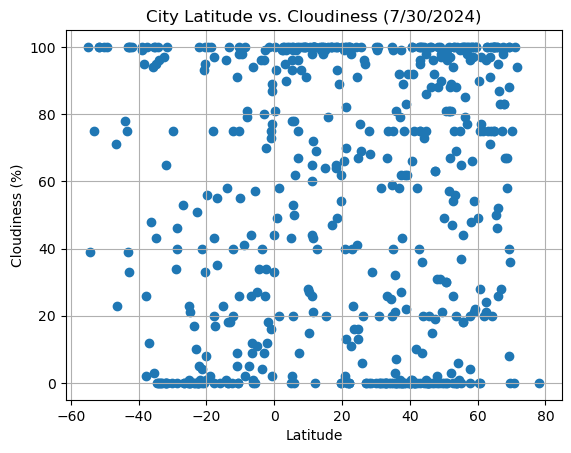

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")
            

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (7/30/2024)" )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

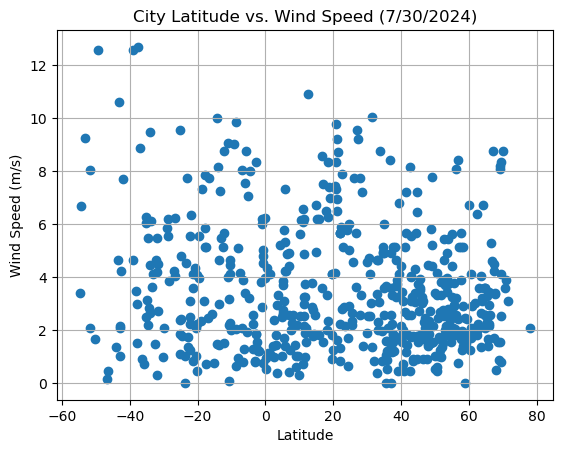

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")
            

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (7/30/2024)" )
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#plt.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dzilam gonzalez,21.2833,21.2833,304.93,59,100,4.97,MX,1722375013
1,manay,7.2150,7.2150,297.22,84,30,1.88,PH,1722375013
2,horta,38.5333,38.5333,296.95,78,20,6.17,PT,1722375014
3,st. john's,47.5649,47.5649,300.46,69,75,10.29,CA,1722375014
5,figuig (centre),32.1089,32.1089,308.14,13,53,3.16,MA,1722375014


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,bredasdorp,-34.5322,-34.5322,279.97,80,3,1.96,ZA,1722375014
8,margaret river,-33.9500,-33.9500,288.28,85,33,6.34,AU,1722375015
9,puerto santa,-8.9906,-8.9906,291.72,79,32,4.18,PE,1722375016
11,port-aux-francais,-49.3500,-49.3500,276.99,96,100,12.14,TF,1722375016
16,port alfred,-33.5906,-33.5906,284.36,70,41,0.45,ZA,1722375017


###  Temperature vs. Latitude Linear Regression Plot

R-squared = 0.380438


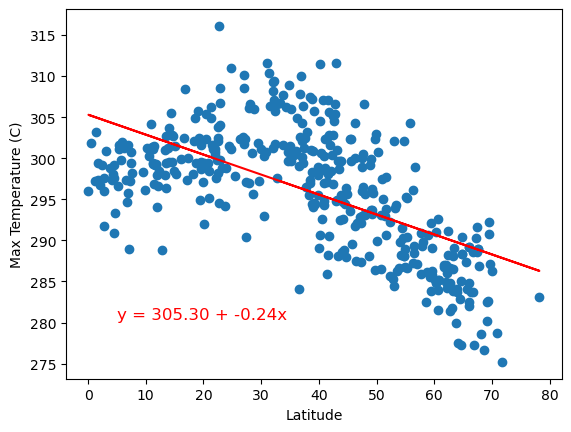

In [ ]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
res = linregress(x, y)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"] , marker="o")
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

# Annotate the plot with the equation of the line
equation_text = f"y = {res.intercept:.2f} + {res.slope:.2f}x"
plt.text(x=5, y=280, s=equation_text, fontsize=12, color='red', verticalalignment='bottom')

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

print(f"R-squared = {res.rvalue**2:.6f}")

R-squared = 0.722179


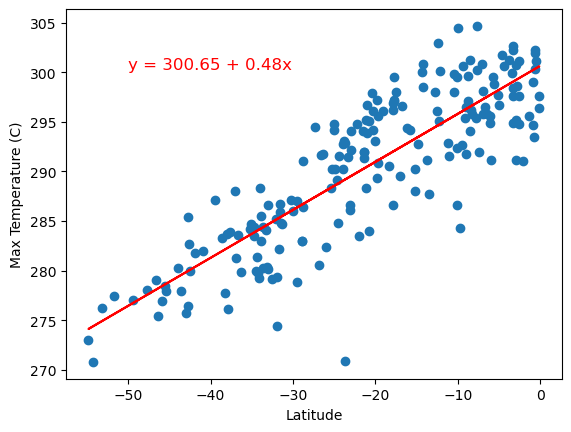

In [ ]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
res = linregress(x, y)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"] , marker="o")
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

# Annotate the plot with the equation of the line
equation_text = f"y = {res.intercept:.2f} + {res.slope:.2f}x"
plt.text(x=-50, y=300, s=equation_text, fontsize=12, color='red', verticalalignment='bottom')

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

print(f"R-squared = {res.rvalue**2:.6f}")

**Discussion about the linear relationship:** Temperature definitely increases in the direction of the equador.

### Humidity vs. Latitude Linear Regression Plot

R-squared = 0.001673


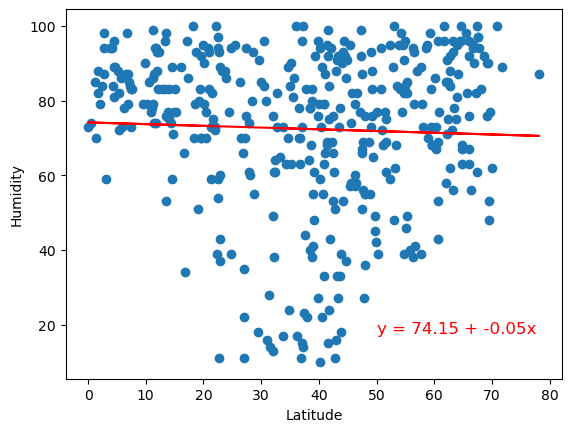

In [ ]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
res = linregress(x, y)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"] , marker="o")
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

# Annotate the plot with the equation of the line
equation_text = f"y = {res.intercept:.2f} + {res.slope:.2f}x"
plt.text(x=50, y=17, s=equation_text, fontsize=12, color='red', verticalalignment='bottom')

# Incorporate the other graph properties
plt.ylabel("Humidity")
plt.xlabel("Latitude")

print(f"R-squared = {res.rvalue**2:.6f}")

R-squared = 0.006947


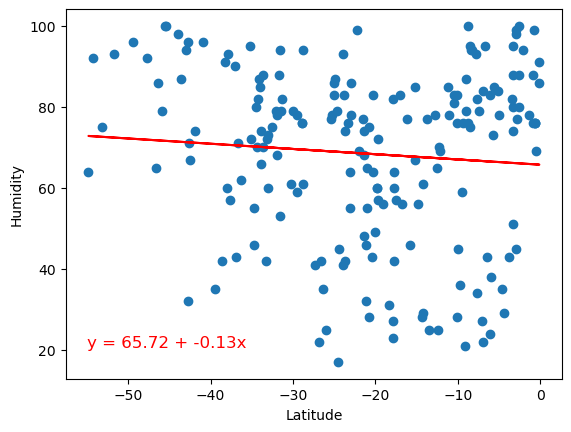

In [ ]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
res = linregress(x, y)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"] , marker="o")
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

# Annotate the plot with the equation of the line
equation_text = f"y = {res.intercept:.2f} + {res.slope:.2f}x"
plt.text(x=-55, y=20, s=equation_text, fontsize=12, color='red', verticalalignment='bottom')

# Incorporate the other graph properties
plt.ylabel("Humidity")
plt.xlabel("Latitude")

print(f"R-squared = {res.rvalue**2:.6f}")

**Discussion about the linear relationship:** The northern hemisphere is definitely more humid than the southern.

### Cloudiness vs. Latitude Linear Regression Plot

R-squared = 0.016253


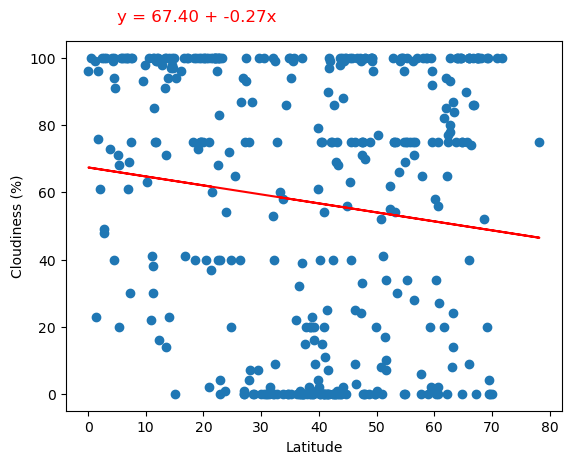

In [ ]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
res = linregress(x, y)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"] , marker="o")
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

# Annotate the plot with the equation of the line
equation_text = f"y = {res.intercept:.2f} + {res.slope:.2f}x"
plt.text(x=5, y=110, s=equation_text, fontsize=12, color='red', verticalalignment='bottom')

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"R-squared = {res.rvalue**2:.6f}")

R-squared = 0.043048


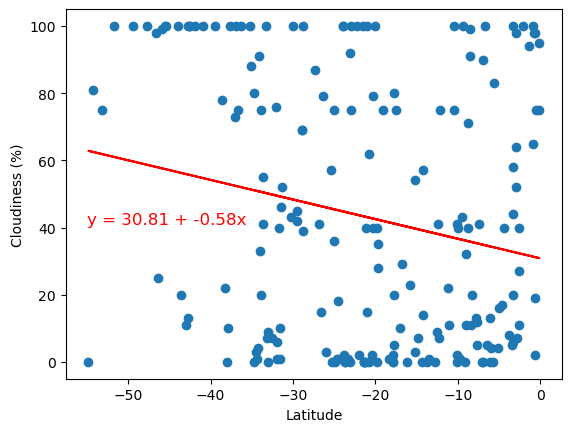

In [ ]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
res = linregress(x, y)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"] , marker="o")
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

# Annotate the plot with the equation of the line
equation_text = f"y = {res.intercept:.2f} + {res.slope:.2f}x"
plt.text(x=-55, y=40, s=equation_text, fontsize=12, color='red', verticalalignment='bottom')

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"R-squared = {res.rvalue**2:.6f}")

**Discussion about the linear relationship:** There are more clouds the further a person moves from the equador.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared = 0.001006


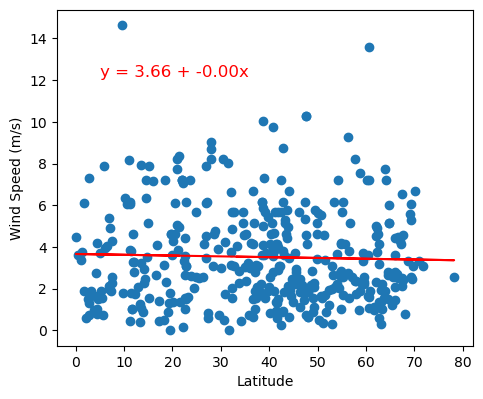

In [ ]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
res = linregress(x, y)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"] , marker="o")
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

# Annotate the plot with the equation of the line
equation_text = f"y = {res.intercept:.2f} + {res.slope:.2f}x"
plt.text(x=5, y=12, s=equation_text, fontsize=12, color='red', verticalalignment='bottom')

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

print(f"R-squared = {res.rvalue**2:.6f}")

R-squared = 0.007162


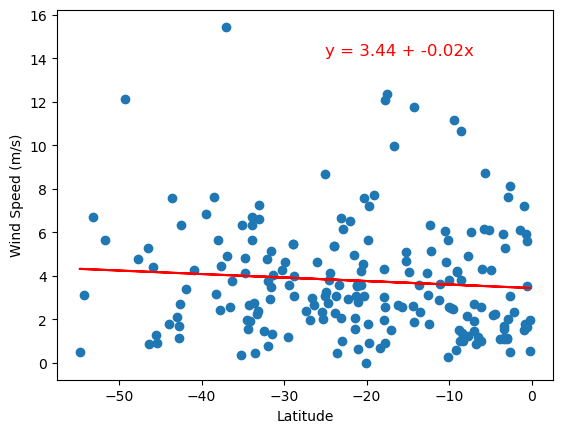

In [ ]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
res = linregress(x, y)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"] , marker="o")
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

# Annotate the plot with the equation of the line
equation_text = f"y = {res.intercept:.2f} + {res.slope:.2f}x"
plt.text(x=-25, y=14, s=equation_text, fontsize=12, color='red', verticalalignment='bottom')

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

print(f"R-squared = {res.rvalue**2:.6f}")

**Discussion about the linear relationship:** Wind speeds are moderate for both hemispheres regardless of latitude.